<a href="https://colab.research.google.com/github/peeush-agarwal/week-based-learning/blob/master/Deep-Learning/RNNs/Understanding_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding RNNs

+ The purpose of this tutorial is to train a RNN model which should take a word and classify it as fruit or vegetable. 

## Prepare synthetic data

In [0]:
data = {
    'Fruit': ['Apple','Mango','Grapes','Banana','Orange','Musk melon','Water melon'],
    'Vegetable':['Brinjal', 'Potato','Tomato','Carrot','Lady finger','Capsicum']
}

In [3]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('dark_background')

import string
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
all_names = []
for v in data.values():
  all_names.extend(v)
n_names = len(all_names)

In [5]:
print(all_names)
print(n_names)

['Apple', 'Mango', 'Grapes', 'Banana', 'Orange', 'Musk melon', 'Water melon', 'Brinjal', 'Potato', 'Tomato', 'Carrot', 'Lady finger', 'Capsicum']
13


In [0]:
all_categories = list(data.keys())
n_categories = len(all_categories)

In [7]:
print(all_categories)
print(n_categories)

['Fruit', 'Vegetable']
2


In [0]:
def category_to_tensor(category):
  return torch.tensor([all_categories.index(category)], dtype=torch.long)

In [9]:
print(category_to_tensor('Fruit'))
print(category_to_tensor('Vegetable'))

tensor([0])
tensor([1])


In [0]:
def output_to_category(cat_tensor):
  _, idx = torch.max(cat_tensor, 1)
  return all_categories[idx]

In [11]:
print(output_to_category(torch.tensor([[0.3, 0.7]])))
print(output_to_category(torch.tensor([[0.999, 0.001]])))
# print(index_to_category(2))

Vegetable
Fruit


In [0]:
all_letters = string.ascii_letters + ' ' # Model's vocab
n_letters = len(all_letters)

In [0]:
def char_to_tensor(c):
  tensor = torch.zeros((1, n_letters))
  tensor[0][all_letters.index(c)] = 1
  return tensor

In [14]:
print(char_to_tensor('a'))
print(char_to_tensor('z'))
print(char_to_tensor('B'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [0]:
def name_to_tensor(name):
  tensor = torch.zeros((len(name), 1, n_letters))
  for idx, c in enumerate(name):
    tensor[idx] = char_to_tensor(c)
  return tensor

In [16]:
name_to_tensor('Apple')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [0]:
def randomChoice(list_):
  i = random.randint(0, len(list_)-1)
  return list_[i]

In [18]:
randomChoice(all_categories)

'Fruit'

In [0]:
def random_training_sample():
  category = randomChoice(all_categories)
  name = randomChoice(data[category])
  return category, name, category_to_tensor(category), name_to_tensor(name)

In [20]:
random_training_sample()

('Fruit',
 'Musk melon',
 tensor([0]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 

## Recurrent Neural Network architecture
![RNN_architecture](https://i.imgur.com/Z2xbySO.png)

In [0]:
class BasicRNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(BasicRNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size+hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)
  
  def forward(self, input_, hidden):
    combined = torch.cat((input_, hidden), dim=1)

    hidden = self.i2h(combined)
    out = self.i2o(combined)
    out = self.softmax(out)
    return out, hidden
  
  def init_hidden(self):
    return torch.zeros((1, self.hidden_size))

In [0]:
hidden_size = 10
model = BasicRNN(n_letters, hidden_size, n_categories)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [0]:
def infer(name_tensor):
  model.eval()

  hidden = model.init_hidden()
  for idx in range(name_tensor.size()[0]):
    output, hidden = model(name_tensor[idx], hidden)
  
  return output

In [24]:
infer(name_to_tensor('Apple'))

tensor([[-0.6384, -0.7511]], grad_fn=<LogSoftmaxBackward>)

In [0]:
def train(name_tensor, category_tensor):
  model.train()

  optimizer.zero_grad()
  hidden = model.init_hidden()
  for idx in range(name_tensor.size()[0]):
    output, hidden = model(name_tensor[idx], hidden)
  
  loss = criterion(output, category_tensor)
  loss.backward()
  optimizer.step()

  return output, loss

In [26]:
category, name, category_tensor, name_tensor = random_training_sample()
print(category, name)
output, loss = train(name_tensor, category_tensor)
print(output)
print(loss)

Fruit Apple
tensor([[-0.6384, -0.7511]], grad_fn=<LogSoftmaxBackward>)
tensor(0.6384, grad_fn=<NllLossBackward>)


In [27]:
n_iters = 5000

losses = []
conf_mat = np.zeros((n_categories, n_categories), dtype=np.int)

for iter_id in range(n_iters):
  category, name, category_tensor, name_tensor = random_training_sample()
  output, loss = train(name_tensor, category_tensor)

  if iter_id % 100 == 0:
    print(f'Iter:{iter_id} {100.0*iter_id/n_iters:.2f}% loss:{loss.item()} {name}=>{output_to_category(output)} ({category})')
    
    losses.append(loss.item())
    conf_mat[all_categories.index(category)][all_categories.index(output_to_category(output))] += 1

Iter:0 0.00% loss:0.6052471399307251 Brinjal=>Vegetable (Vegetable)
Iter:100 2.00% loss:0.5746197700500488 Brinjal=>Vegetable (Vegetable)
Iter:200 4.00% loss:0.5946537256240845 Capsicum=>Vegetable (Vegetable)
Iter:300 6.00% loss:0.5647387504577637 Water melon=>Fruit (Fruit)
Iter:400 8.00% loss:0.4798705577850342 Water melon=>Fruit (Fruit)
Iter:500 10.00% loss:0.5251421928405762 Banana=>Fruit (Fruit)
Iter:600 12.00% loss:0.2771493196487427 Apple=>Fruit (Fruit)
Iter:700 14.00% loss:0.36575955152511597 Tomato=>Vegetable (Vegetable)
Iter:800 16.00% loss:0.3240842819213867 Potato=>Vegetable (Vegetable)
Iter:900 18.00% loss:0.3115648031234741 Brinjal=>Vegetable (Vegetable)
Iter:1000 20.00% loss:0.31566449999809265 Brinjal=>Vegetable (Vegetable)
Iter:1100 22.00% loss:0.29830506443977356 Grapes=>Fruit (Fruit)
Iter:1200 24.00% loss:0.08095861971378326 Orange=>Fruit (Fruit)
Iter:1300 26.00% loss:0.16045552492141724 Capsicum=>Vegetable (Vegetable)
Iter:1400 28.00% loss:0.26934781670570374 Carrot=

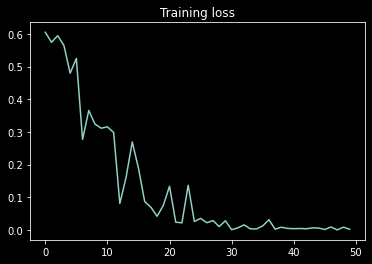

In [28]:
plt.plot(losses)
plt.title('Training loss')
plt.show()

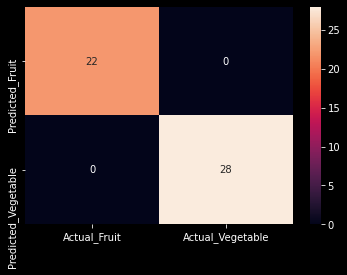

In [29]:
sns.heatmap(conf_mat, annot=True, 
            xticklabels=[f'Actual_{all_categories[idx]}' for idx in range(n_categories)], 
            yticklabels=[f'Predicted_{all_categories[idx]}' for idx in range(n_categories)])
plt.show()

In [0]:
def eval(name):
  model.eval()

  name_tensor = name_to_tensor(name)
  output = infer(name_tensor)
  val, indices = output.topk(1)

  #print(all_categories[indices.item()])
  return all_categories[indices.item()]

In [31]:
[(name,eval(name)) for name in all_names]

[('Apple', 'Fruit'),
 ('Mango', 'Fruit'),
 ('Grapes', 'Fruit'),
 ('Banana', 'Fruit'),
 ('Orange', 'Fruit'),
 ('Musk melon', 'Fruit'),
 ('Water melon', 'Fruit'),
 ('Brinjal', 'Vegetable'),
 ('Potato', 'Vegetable'),
 ('Tomato', 'Vegetable'),
 ('Carrot', 'Vegetable'),
 ('Lady finger', 'Vegetable'),
 ('Capsicum', 'Vegetable')]

In [0]:
test_names = ['apple', 'alphonso mango','mango desi','red tomato','american tomato','chilly','reddish', 'lemon', 'rose','jal','jccazzlpp']

In [33]:
[(name,eval(name)) for name in test_names]

[('apple', 'Fruit'),
 ('alphonso mango', 'Fruit'),
 ('mango desi', 'Fruit'),
 ('red tomato', 'Vegetable'),
 ('american tomato', 'Vegetable'),
 ('chilly', 'Fruit'),
 ('reddish', 'Vegetable'),
 ('lemon', 'Fruit'),
 ('rose', 'Vegetable'),
 ('jal', 'Vegetable'),
 ('jccazzlpp', 'Fruit')]